# Markov Matrices

## 1) Definition

A **Markov matrix** (or **stochastic matrix**) $P \in \mathbb{R}^{n \times n}$ satisfies:

1. All entries are non-negative:
$$
P_{ij} \ge 0, \quad \forall i,j
$$

2. Each column sums to 1 (column-stochastic) or each row sums to 1 (row-stochastic):
$$
\sum_{i=1}^n P_{ij} = 1 \quad \text{(column-stochastic)}
$$

Markov matrices describe transitions between states in a **discrete-time Markov chain**.


## 2) Derivation

1. Let $\mathbf{x}_k \in \mathbb{R}^n$ be a **state vector** at step $k$ representing probabilities of being in each state.

2. Transition to next step:
$$
\mathbf{x}_{k+1} = P \mathbf{x}_k
$$

3. Repeated application:
$$
\mathbf{x}_{k+m} = P^m \mathbf{x}_k
$$

4. Long-term behavior:
- If $P$ is regular, $\lim_{m \to \infty} P^m$ exists and all columns converge to the **stationary distribution** $\pi$:
$$
P \pi = \pi
$$


## 3) Computation

In [1]:
import jax.numpy as jnp

# Example Markov matrix (row-stochastic)
P = jnp.array([[0.7, 0.3],
               [0.3, 0.7]])

# Initial state
x0 = jnp.array([1., 0.])  # start in state 1

# Compute next 10 steps
steps = 10
x = [x0]
for _ in range(steps):
    x_next = P @ x[-1]
    x.append(x_next)

x = jnp.array(x)
print("State probabilities over time:\n", x)


State probabilities over time:
 [[1.         0.        ]
 [0.7        0.3       ]
 [0.58       0.42000002]
 [0.532      0.468     ]
 [0.5128     0.4872    ]
 [0.50512    0.49488   ]
 [0.502048   0.49795198]
 [0.5008192  0.4991808 ]
 [0.5003277  0.49967232]
 [0.5001311  0.49986896]
 [0.50005245 0.4999476 ]]


##4) Plotting

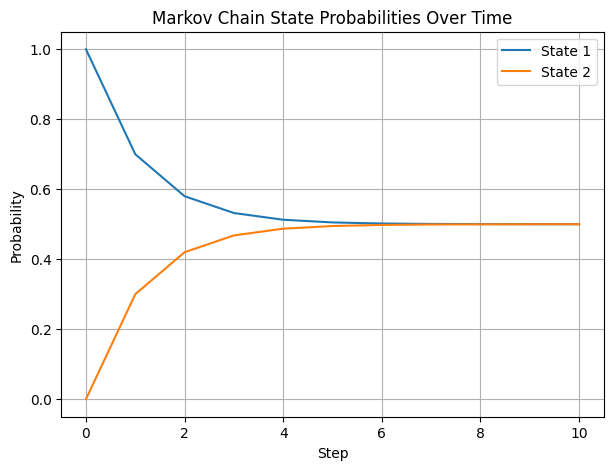

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(x[:,0], label='State 1')
plt.plot(x[:,1], label='State 2')
plt.xlabel('Step')
plt.ylabel('Probability')
plt.title('Markov Chain State Probabilities Over Time')
plt.grid(True)
plt.legend()
plt.show()


## 5) Use Cases of Markov Matrices

1. **PageRank Algorithm:** Google uses Markov matrices for web page ranking.
2. **Population Dynamics:** Modeling probabilities of moving between populations or states.
3. **Finance:** Predict credit rating transitions.
4. **Queueing Systems:** Probability of system states in service networks.
5. **Steady-State Analysis:** Long-term distribution of states using stationary distribution.


# Fourier Series

## 1) Definition

A **Fourier series** expresses a periodic function $f(t)$ with period $T$ as a sum of sines and cosines:

$$
f(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right]
$$

where the coefficients are:

$$
a_0 = \frac{1}{T} \int_0^T f(t) dt, \quad
a_n = \frac{2}{T} \int_0^T f(t) \cos\left(\frac{2\pi n t}{T}\right) dt, \quad
b_n = \frac{2}{T} \int_0^T f(t) \sin\left(\frac{2\pi n t}{T}\right) dt
$$


## 2) Derivation

1. Any periodic function $f(t)$ can be projected onto the orthogonal basis of sines and cosines.

2. Coefficients $a_n$ and $b_n$ are computed using **inner products**:

$$
a_n = \frac{2}{T} \langle f, \cos(2\pi n t / T) \rangle, \quad
b_n = \frac{2}{T} \langle f, \sin(2\pi n t / T) \rangle
$$

3. This yields the Fourier series expansion, allowing decomposition into frequency components.


## 3) Computation

In [3]:
import jax.numpy as jnp

# Define function f(t)
T = 2*jnp.pi
t = jnp.linspace(0, T, 500)
f = jnp.sin(t) + 0.5*jnp.sin(2*t)  # example function

# Number of Fourier terms
N = 5

a0 = jnp.mean(f)  # average
a = jnp.zeros(N)
b = jnp.zeros(N)

for n in range(1, N+1):
    a = a.at[n-1].set(2*jnp.mean(f * jnp.cos(n*t)))
    b = b.at[n-1].set(2*jnp.mean(f * jnp.sin(n*t)))

# Reconstruct Fourier series
f_approx = a0 + sum(a[n-1]*jnp.cos(n*t) + b[n-1]*jnp.sin(n*t) for n in range(1,N+1))

print("Fourier coefficients a:", a)
print("Fourier coefficients b:", b)


Fourier coefficients a: [ 3.0517580e-08 -1.1444092e-08  6.4849857e-08  7.0571900e-08
  2.0980837e-08]
Fourier coefficients b: [ 9.9800009e-01  4.9900001e-01 -2.0980837e-08  2.0980837e-08
 -5.5313112e-08]


##4) Plotting

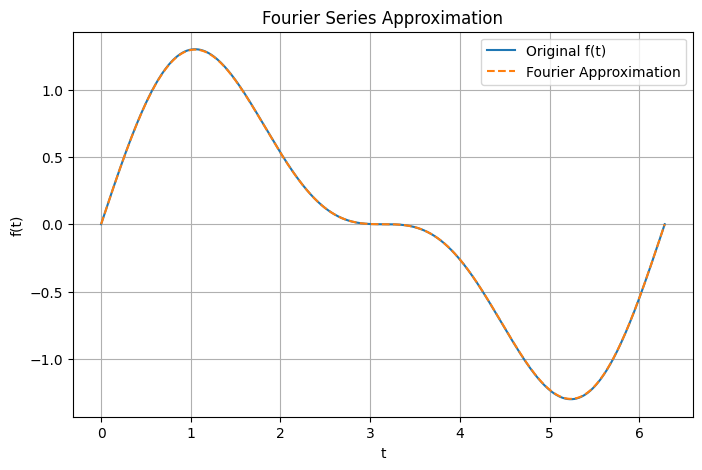

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(t, f, label='Original f(t)')
plt.plot(t, f_approx, '--', label='Fourier Approximation')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Fourier Series Approximation')
plt.grid(True)
plt.legend()
plt.show()


## 5) Use Cases of Fourier Series

1. **Signal Processing:** Decompose signals into frequency components.
2. **Audio Compression:** Represent audio with dominant frequencies (MP3, WAV).
3. **Image Processing:** Fourier transforms for filtering and compression.
4. **Solving PDEs:** Heat, wave, and Laplace equations using separation of variables.
5. **Vibrations Analysis:** Mechanical and civil engineering vibrations study.
6. **Electromagnetics:** Analyzing periodic waves and circuits.
